In [2]:
import pandas as pd

# Load the dataset
ifood_df = pd.read_csv('ifood_df.csv')

# Display the first few rows to understand the data structure
print(ifood_df.head())


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [3]:
# Check for missing values
print(ifood_df.isnull().sum())

# Handle missing values if necessary
# For example, you can fill missing values with the mean or median:
# ifood_df.fillna(ifood_df.mean(), inplace=True)

# Check for duplicate rows
print("Duplicate Rows:", ifood_df.duplicated().sum())

# Explore data types and basic statistics
print(ifood_df.info())
print(ifood_df.describe())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [4]:
# Calculate key metrics
average_purchase_value = ifood_df['MntTotal'].mean()
frequency_of_purchases = ifood_df['NumDealsPurchases'].mean()

print("Average Purchase Value:", average_purchase_value)
print("Frequency of Purchases:", frequency_of_purchases)


Average Purchase Value: 562.7646258503402
Frequency of Purchases: 2.3183673469387753


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for segmentation
features = ifood_df[['MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
ifood_df['Cluster'] = kmeans.fit_predict(features_standardized)


d:\pythinn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


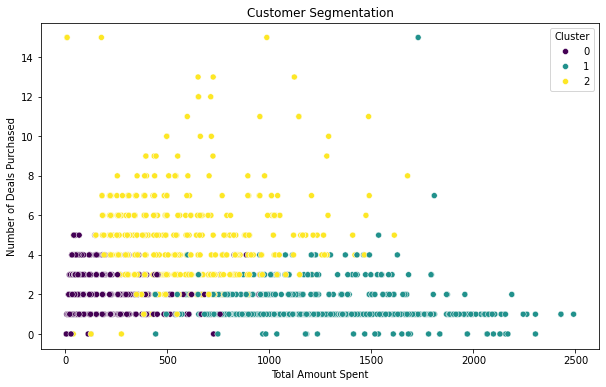

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='NumDealsPurchases', hue='Cluster', data=ifood_df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Deals Purchased')
plt.show()
